In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
caminho_notas = "bases/bases_limpas/base_vendas_limpas.xlsx"
base_notas = pd.read_excel(caminho_notas)
base_notas["Data da venda"] = pd.to_datetime(base_notas["Data da venda"])

C:\Users\Paulo Neto\AppData\Local\Temp\ipykernel_13828\991813996.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  base_notas["Data da venda"] = pd.to_datetime(base_notas["Data da venda"])


In [3]:
base_notas.head(3)

,Numero nota fiscal,Data da venda,Código produto,Descrição do produto,Quantidade do produto,Valor unitário,Preço venda,Preço de custo,Valor da nota
0,566082,2025-06-17,33932,ENV 229X324 OU C/100 FILIPERSON,2.0,33.00,27.48,24.41,3895.94
1,566082,2025-06-17,29367,GUARDANAPO SNOB FS 33X30 50F SANTHER,5.0,2.90,2.50,2.23,3895.94
2,566082,2025-06-17,241,PASTA AZ OF LE TIGRADA FRAMA 356-11952,40.0,9.45,8.86,7.61,3895.94


In [4]:
caminho_estoque = "bases/bases_limpas/base_estoque_limpo.xlsx"
base_estoque = pd.read_excel(caminho_estoque)

In [5]:
base_estoque.head(3)

,Código Produto,Produto,Embalagem,Unidade,Código da Marca,Marca,Quantidade estoque,Preço de custo,Código da categoria,Categoria
0,1,LAPIS Nº2 HB PT C/144 SERELEPE ECOLE,CX/1,CX,1,MARIA GENI DISTRIB. DE ART. DE PAP. LTDA,0.0,9.0000,708,LAPIS ( LAP )
1,3,CANETA HIDRO PONTA FINA PT CIS,UN/1,UN,1272,COMERCIO E IMPORTACAO SERTIC LTDA,0.0,1.4800,35011,CANETA HIDROGRAFICA (CNT)
2,4,BANDEIRINHAS JUNINAS MEGA,PC/1,PC,1,MARIA GENI DISTRIB. DE ART. DE PAP. LTDA,0.0,2.7397,359,BANDEIRAS ( BDJ )


In [6]:
# Na base de vendas:
codigo_vendas = base_notas[base_notas['Descrição do produto'].str.contains('PAPEL MULT PREMIUM A4')]['Código produto'].values

# Na base de estoque:
codigo_estoque = base_estoque[base_estoque['Produto'].str.contains('PAPEL MULT PREMIUM A4')]['Código Produto'].values

print("Código nas vendas:", codigo_vendas)
print("Código no estoque:", codigo_estoque)

Código nas vendas: [16560 16560 16560 ... 16560 16560 16560]
Código no estoque: [16560]


In [7]:
# Volume de dados: Quantas notas fiscais tem? Qual o período coberto?

quantidade_notas = base_notas["Numero nota fiscal"].nunique()
inicio = base_notas["Data da venda"].min()
fim = base_notas["Data da venda"].max()
produto_unicos = base_notas["Código produto"].nunique()
print(f"A base tem {quantidade_notas} notas\nCom {produto_unicos} itens diferentes\nperíodo de {inicio} até {fim}")

A base tem 30036 notas
Com 8914 itens diferentes
período de 2025-01-02 00:00:00 até 2025-06-17 00:00:00


In [8]:
# Produtos mais vendidos: Quais são os produtos com maior quantidade vendida?
mais_vendidos = base_notas.groupby(["Código produto", "Descrição do produto"])["Quantidade do produto"].sum()
mais_vendidos = mais_vendidos.sort_values(ascending=False)
mais_vendidos.head(20)

Código produto  Descrição do produto                    
16560           PAPEL MULT PREMIUM A4 BR 75G 500F REPORT    219224.0
24037           PAPEL A4 BR 75G 500F NOVO ONE               132285.0
453             CANETA ESF 0.7 AZ COMPACTOR 851AZ           122124.0
1093            CANETA ESF CR MEDIA 1.0 AZ BIC               84830.0
36276           ESPONJA D FACE 70X100 LUME                   62928.0
465             CANETA ESF 0.7 PT COMPACTOR 851PT            48540.0
23247           COPO 150ML BR C/100 FC                       45049.0
11335           CANETA ESF CR MEDIA 1.0 PT BIC               44584.0
4996            FITA ADESIVA 45X45 TR SCOTCH 3M 5802         42188.0
36625           ESPONJA D FACE BETTANIN PRO CLEAN            37608.0
3171            COLA ISOPOR 90G FORTFIX 5099                 28743.0
35076           ESPUMINHA SPRAY 400ML ALEGRIA SA40           26955.0
3707            PAPEL A4 SENNINHA BR 75G 100F REPORT         25450.0
8992            TINTA GUACHE 15ML C/6 KOALA DE

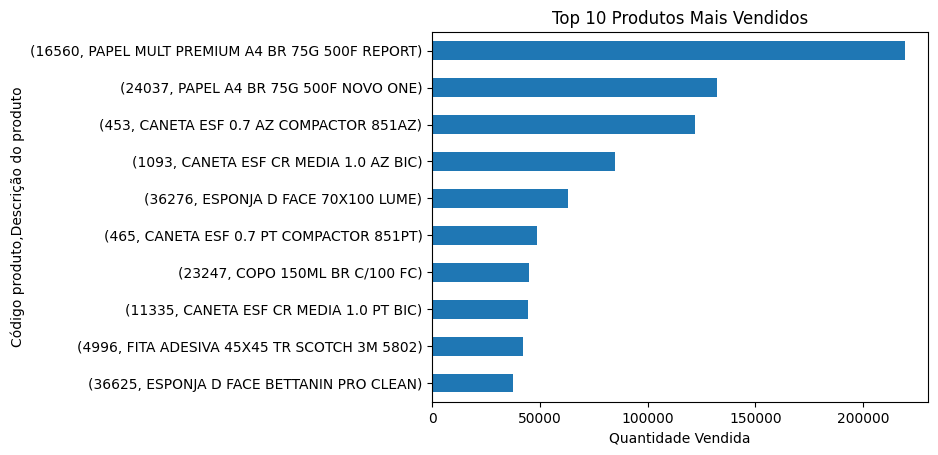

In [9]:
import matplotlib.pyplot as plt
produto_mais_vendidos = mais_vendidos.sort_values(ascending=False)
produto_mais_vendidos.head(10).plot(kind='barh', title='Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.gca().invert_yaxis()  # Inverte a ordem para exibir o maior no topo
plt.show()

In [10]:
# Os produtos com as maiores margens de lucro
base_notas["Margens"] = base_notas["Preço venda"] - base_notas["Preço de custo"]
lucro_por_produto = base_notas.groupby(['Código produto', 'Descrição do produto'])["Margens"].sum()
lucro_por_produto = lucro_por_produto.sort_values(ascending=False)
lucro_por_produto.head(20)

Código produto  Descrição do produto                    
16560           PAPEL MULT PREMIUM A4 BR 75G 500F REPORT    13993.85
34667           ORG GIRE TRAVE 297 PLASUTIL                  8128.61
32579           BOB TERMICA AM 48G 79X40 C/30 DML THEGA      4424.28
2127            PAPEL ESCOLAR A4 BR 200F 60KG MG             4165.81
26097           PAP TOALHA BR 2400F SUIFTPAPER               3136.15
30748           BOB TERMICA BR 80X40 C/30 CLEAR              2322.44
29588           DESINF HOSP ALCOOL 70° INPM 5L FACILITA      2201.03
2179            PAPEL ESCOLAR A4 BR 200F 40KG MG             1892.38
26562           POLASEAL A4 220X307X0.5 C/100 PROLAM         1888.47
27301           PAPEL CONTACT 45X25MX80MIC CR PLAVITEC       1866.02
7809            FILME PVC ESTIC 380X9X1000M AM DISPAFILM     1636.91
8888            FORM CONT RAZAO 80C 2V 3000F PRATIC 7622     1577.06
18839           CANETA ESF FINA 0.8 AZ C/100 BIC             1539.03
22853           POLASEAL A4 220X307X0.5 C/100 

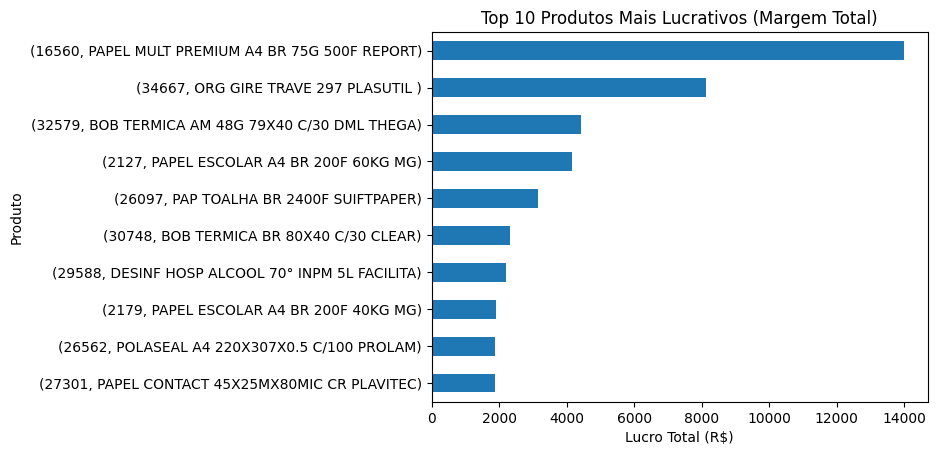

In [11]:
lucro_por_produto.head(10).plot(kind='barh', title='Top 10 Produtos Mais Lucrativos (Margem Total)')
plt.xlabel('Lucro Total (R$)')
plt.ylabel('Produto')
plt.gca().invert_yaxis()  # Inverte a ordem para exibir o maior no topo
plt.show()

In [12]:
# tictk médio de cada produto
ticket_medio_por_produto = base_notas.groupby(['Código produto', 'Descrição do produto'])['Valor unitário'].mean()
ticket_medio_por_produto = ticket_medio_por_produto.sort_values(ascending=False)
print(ticket_medio_por_produto.head(20))

Código produto  Descrição do produto                    
36992           CANETA PENTONIC SORT C/400 CIS              1018.752222
33837           CJ P/COLETA SELETIVA 60L C/4 JSN             996.900000
34667           ORG GIRE TRAVE 297 PLASUTIL                  821.499273
33343           FEIRINHA FESTIV POTES DUO C/460 PLASUTIL     788.944000
20270           CARRO MULTIFUN C/BOLSA BETTANIN 9160         772.190000
36993           CANETA ESF BPX SORT C/400 CIS                730.654545
17975           ENCADERNADORA STAND 15F 54 FUR EXCENTRIX     684.768182
36613           NO BREAK BIV 115/220 1000VA TS SHARA         649.460000
20993           BALDE C/ESPREM C/DIV 33L BETTANIN 9077       618.098750
28730           PLASTIFICADORA COMPACT A3 MENNO 8372         592.815556
34507           GAZEBO X-FLEX OXFORD 3X3 AZ MOR              588.000000
26063           NO BREAK 220V 700VA SNB INTELBRAS            574.540000
23579           FRAGMENTADORA 8FLS 220V MENNO                565.428333
28173  

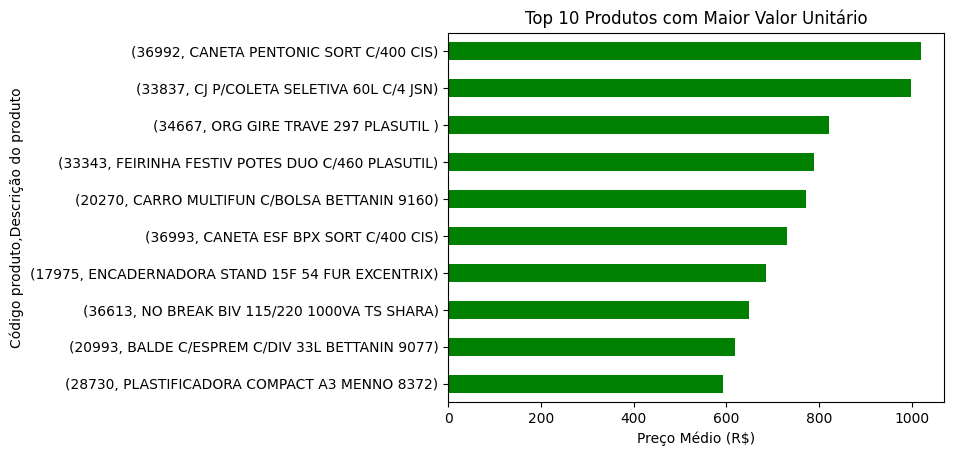

In [13]:
ticket_medio_por_produto.head(10).plot(kind='barh', color='green', title='Top 10 Produtos com Maior Valor Unitário')
plt.xlabel('Preço Médio (R$)')
plt.gca().invert_yaxis()  # Inverte a ordem para exibir o maior no topo
plt.show()

In [14]:
base_estoque.columns.tolist()

['Código Produto',
 'Produto',
 'Embalagem',
 'Unidade',
 'Código da Marca',
 'Marca',
 'Quantidade estoque',
 'Preço de custo',
 'Código da categoria',
 'Categoria']

In [15]:
base_notas.columns.tolist()

['Numero nota fiscal',
 'Data da venda',
 'Código produto',
 'Descrição do produto',
 'Quantidade do produto',
 'Valor unitário',
 'Preço venda',
 'Preço de custo',
 'Valor da nota',
 'Margens']

In [16]:
# Passo 1: Padronizar os nomes das colunas
base_estoque = base_estoque.rename(columns={'Código Produto': 'Código produto'})  # Corrige possível erro de digitação

# Passo 2: Selecionar colunas relevantes do estoque
colunas_estoque = [
    'Código produto',  
    'Marca',
    'Categoria',
    'Quantidade estoque'
]

In [17]:
# Passo 3: Fazer o merge (junção)
df_vendas_enriquecido = pd.merge(
    base_notas,
    base_estoque[colunas_estoque],
    on='Código produto',  # Se as colunas tiverem o mesmo nome após renomear
    how='left'  # Mantém todas as vendas, mesmo sem registro no estoque
)

In [18]:
df_vendas_enriquecido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327203 entries, 0 to 327202
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Numero nota fiscal     327203 non-null  int64         
 1   Data da venda          327203 non-null  datetime64[ns]
 2   Código produto         327203 non-null  int64         
 3   Descrição do produto   327203 non-null  object        
 4   Quantidade do produto  327203 non-null  float64       
 5   Valor unitário         327203 non-null  float64       
 6   Preço venda            327203 non-null  float64       
 7   Preço de custo         327203 non-null  float64       
 8   Valor da nota          327203 non-null  float64       
 9   Margens                327203 non-null  float64       
 10  Marca                  327203 non-null  object        
 11  Categoria              327203 non-null  object        
 12  Quantidade estoque     327203 non-null  floa

In [19]:
df_vendas_enriquecido.describe()

,Numero nota fiscal,Data da venda,Código produto,Quantidade do produto,Valor unitário,Preço venda,Preço de custo,Valor da nota,Margens,Quantidade estoque
count,327203.000000,327203,327203.000000,327203.000000,327203.000000,327203.000000,327203.000000,327203.000000,327203.000000,327203.000000
mean,481624.945477,2025-03-19 21:07:13.679397632,22073.424477,15.293348,16.032381,13.208353,11.794825,2089.546597,1.413528,4047.586284
min,16912.000000,2025-01-02 00:00:00,5.000000,1.000000,0.150000,0.150000,0.150000,1.040000,-66.380000,0.000000
25%,544299.000000,2025-01-30 00:00:00,11464.000000,2.000000,4.010000,3.210000,2.830000,505.980000,0.340000,61.000000
50%,551178.000000,2025-03-17 00:00:00,24762.000000,5.000000,8.330000,6.770000,6.040000,1080.450000,0.730000,298.000000
75%,558745.000000,2025-05-06 00:00:00,32252.000000,12.000000,18.980000,15.310000,13.530000,2342.375000,1.660000,1289.000000
max,566082.000000,2025-06-17 00:00:00,38229.000000,9000.000000,1169.000000,974.760000,880.340000,178016.720000,111.460000,166112.000000
std,179721.132888,NaN,11715.278200,78.082460,28.893099,23.756542,21.249346,3675.361647,2.715668,16907.947010


In [20]:
df_vendas_enriquecido[df_vendas_enriquecido["Preço venda"] < df_vendas_enriquecido["Preço de custo"]]

,Numero nota fiscal,Data da venda,Código produto,Descrição do produto,Quantidade do produto,Valor unitário,Preço venda,Preço de custo,Valor da nota,Margens,Marca,Categoria,Quantidade estoque
31,566080,2025-06-17,2182,CX ISOPOR 17L ISOPLAST,6.0,21.99,12.94,13.45,1203.74,-0.51,ISOPLAST IND COM DE PLASTICOS LTDA,CAIXA TERMICA,53.0
542,566039,2025-06-16,7893,TINTA P/ARTES LL 37ML ACRILEX 528,3.0,4.03,2.68,2.79,496.12,-0.11,ACRILEX TINTAS ESPECIAIS S.A,TINTAS ( TTA ),564.0
1524,565936,2025-06-16,33766,LUVA POLIESTER REVEST PU PT DELTAPLUS,1.0,3.16,2.99,3.16,351.15,-0.17,DELTA PLUS BRASIL INDUSTRIA E COMERCIO DE EPI ...,LUVA ( LUV ),45.0
1527,565936,2025-06-16,10622,ETQ REDONDA 12MM PT C/210 PIMACO TP12PT,25.0,2.87,2.85,2.87,351.15,-0.02,AUTO ADESIVOS PARANA S A,ETIQUETAS ( ETQ ),51.0
1528,565936,2025-06-16,8248,MASSINHA SOFT 180G C/12 ACRILEX 07312,72.0,3.39,3.37,3.39,351.15,-0.02,ACRILEX TINTAS ESPECIAIS S.A,MASSAS,11579.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325601,17281,2025-01-18,29504,BORRACHA OVAL SETAS E ESTRELA C/2 MERCUR,1.0,3.60,2.56,2.79,52.86,-0.23,MERCUR SA,BORRACHAS ( BOR ),16.0
325712,17256,2025-01-17,16562,EVA ROLO ECON AM BB IBEL,1.0,2.36,1.72,1.79,84.99,-0.07,IBEL IND DE BORRACHA EVA LTDA,EVA ( EVA ),248.0
326454,17095,2025-01-10,25445,CANETA HIDRO NEOPEN GG PASTEL COMPACTOR,2.0,5.56,3.72,3.86,562.66,-0.14,CIA DE CANETAS COMPACTOR S/A,CANETA HIDROGRAFICA ( CHG ),178.0
326455,17095,2025-01-10,25445,CANETA HIDRO NEOPEN GG PASTEL COMPACTOR,3.0,5.56,3.72,3.86,562.66,-0.14,CIA DE CANETAS COMPACTOR S/A,CANETA HIDROGRAFICA ( CHG ),178.0


In [21]:
# Verificando valores negativos ou zerados onde não deveriam existir
cols_numericas = ['Quantidade do produto', 'Valor unitário', 'Preço venda', 'Preço de custo', 'Quantidade estoque']
for col in cols_numericas:
    print(f"\n--- Análise de {col} ---")
    print(f"Valores negativos: {len(df_vendas_enriquecido[df_vendas_enriquecido[col] < 0])}")
    print(f"Valores zerados: {len(df_vendas_enriquecido[df_vendas_enriquecido[col] == 0])}")
    print(f"Valores acima do percentil 99%: {df_vendas_enriquecido[col].quantile(0.99)}")


--- Análise de Quantidade do produto ---
Valores negativos: 0
Valores zerados: 0
Valores acima do percentil 99%: 150.0

--- Análise de Valor unitário ---
Valores negativos: 0
Valores zerados: 0
Valores acima do percentil 99%: 109.00979999999981

--- Análise de Preço venda ---
Valores negativos: 0
Valores zerados: 0
Valores acima do percentil 99%: 89.62

--- Análise de Preço de custo ---
Valores negativos: 0
Valores zerados: 0
Valores acima do percentil 99%: 81.74

--- Análise de Quantidade estoque ---
Valores negativos: 0
Valores zerados: 6448
Valores acima do percentil 99%: 83578.0


In [22]:
df_vendas_enriquecido.columns.tolist()

['Numero nota fiscal',
 'Data da venda',
 'Código produto',
 'Descrição do produto',
 'Quantidade do produto',
 'Valor unitário',
 'Preço venda',
 'Preço de custo',
 'Valor da nota',
 'Margens',
 'Marca',
 'Categoria',
 'Quantidade estoque']

In [23]:
# Para entender melhor a distribuição
print(df_vendas_enriquecido[df_vendas_enriquecido['Quantidade estoque'] > 83578]['Quantidade estoque'].describe())

# Para produtos com estoque zero
print(df_vendas_enriquecido[df_vendas_enriquecido['Quantidade estoque'] == 0]['Descrição do produto'].value_counts())

count      1496.0
mean     166112.0
std           0.0
min      166112.0
25%      166112.0
50%      166112.0
75%      166112.0
max      166112.0
Name: Quantidade estoque, dtype: float64
Descrição do produto
CAPA ENCAD A4 CR C/100 PROLAM               339
ACUCAR CRISTAL 1KG SAMUKA                   178
PILHA ALCALINA AA 1,5V C/2 MAXPRINT         167
BOB TERMICA AM 48G 57X300 C/6 DML THEGA     130
LIMPADOR PERF LAVANDA 120ML COALA           123
                                           ... 
CAD CD ROBIN HOOD 1M 80F TILIBRA 342203       1
BL POST IT 76X76 VD LIMEADE 90F 3M            1
LAPIS PT ECO SS GLAMOUR C/72 FABER            1
GLITTER ESCOLAR 250G COLOR REAL SEDA          1
MOCHILA C/RODA 16 SCOOBY DOO GHOS XERYUS      1
Name: count, Length: 632, dtype: int64


In [24]:
erros_preco = df_vendas_enriquecido[df_vendas_enriquecido['Preço venda'] < df_vendas_enriquecido['Preço de custo']]
print(f"Registros onde Preço Venda < Preço Custo: {len(erros_preco)}")

Registros onde Preço Venda < Preço Custo: 4583


In [25]:
# verificação de variações de escrita em 'Marca' e 'Categoria'
print("\nMarcas únicas:", df_vendas_enriquecido['Marca'].nunique())
print(df_vendas_enriquecido['Marca'].value_counts().head(20))


Marcas únicas: 338
Marca
BRW SUPRIMENTOS ESCOLARES E ESCRITORIO LTDA.          16126
CIA DE CANETAS COMPACTOR S/A                          13348
SUZANO PAPEL E CELULOSE SA                             9346
ACCO BRANDS BRASIL LTDA                                8608
ACRILEX TINTAS ESPECIAIS S.A                           8547
GRUPO MASTER COMERCIO IMPORTACAO E EXPORTACAO LTDA     8123
COMERCIO E IMPORTACAO SERTIC LTDA                      8002
LEONORA COM DE PAPEL IMP E EXP LTDA                    7779
3M DO BRASIL LTDA                                      7112
BIGNARDI IND.E COM.DE PAP E ARTEFAT LTDA               7014
PIGMENTAR INDUSTRIA QUIMICA LTDA                       6414
PILOT PEN DO BRASIL SA IND E COM                       6149
BIC BRASIL S/A                                         5718
GLACE COMERCIO E BENEFICIAMENTO DE PAPEIS EIRELI       5609
DELTA INDUSTRIA E COMERCIO DE GIZ LTDA.                4654
PLASUTIL INDUSTRIA E COMERCIO DE PLASTICOS LTDA        4609
MERCUR SA     

In [26]:
# verificação de variações de escrita em 'Categoria'
print("\nCategorias únicas:", df_vendas_enriquecido['Categoria'].nunique())
print(df_vendas_enriquecido['Categoria'].value_counts().head(20))


Categorias únicas: 439
Categoria
CADERNOS ( CAD )              19428
CANETAS ( CNT )               16804
FITAS ( FTA )                 12228
PAPEIS ( PAP )                 9799
PASTAS ( PST )                 9793
MARCA TEXTO ( MRT)             7829
PAPEL A4                       7531
COLAS ( COL )                  6798
SACOS P/LIXO ( SAC )           6423
EVA ( EVA )                    5849
BLOCOS ( BL )                  5517
MARCADORES ( MRC )             5451
COPOS DESCARTAVEIS ( COP )     5036
DESINFETANTES ( DES )          4992
GRAMPOS ( GRA )                4754
BORRACHAS ( BOR )              4621
CLIPS ( CLI )                  4360
VELAS ( VLA )                  4236
MASSAS                         4193
TINTAS  ( TIT )                4044
Name: count, dtype: int64


In [27]:
# Verifique se há códigos com mais de uma descrição
codigos_com_multiplas_desc = df_vendas_enriquecido.groupby('Código produto')['Descrição do produto'].nunique()
print("Códigos com mais de uma descrição:", codigos_com_multiplas_desc[codigos_com_multiplas_desc > 1])

Códigos com mais de uma descrição: Series([], Name: Descrição do produto, dtype: int64)


In [28]:
# Verifique se há descrição com mais de um código
codigos_com_multiplas_desc = df_vendas_enriquecido.groupby('Descrição do produto')['Código produto'].nunique()
print("Códigos com mais de uma descrição:", codigos_com_multiplas_desc[codigos_com_multiplas_desc > 1])

Códigos com mais de uma descrição: Series([], Name: Código produto, dtype: int64)


In [29]:
produtos_sem_estoque = df_vendas_enriquecido[df_vendas_enriquecido['Quantidade estoque'] == 0]['Código produto'].unique()
print(f"Produtos vendidos mas nunca no estoque: {len(produtos_sem_estoque)}")

Produtos vendidos mas nunca no estoque: 632


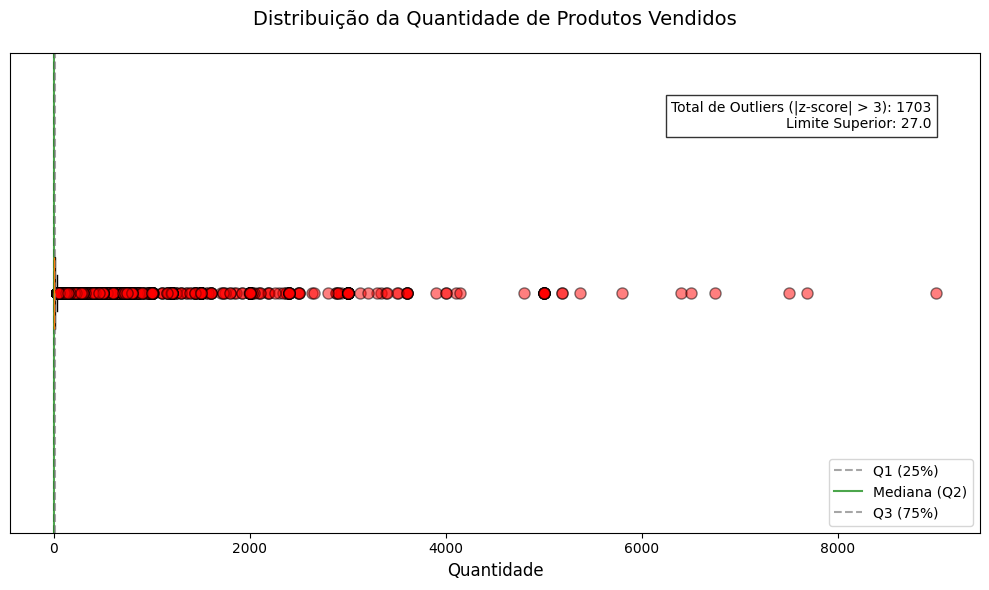

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Dados
quantidades = df_vendas_enriquecido['Quantidade do produto']

# --- Gráfico Boxplot Aprimorado ---
plt.figure(figsize=(10, 6))

# Boxplot principal
boxplot = plt.boxplot(quantidades, 
                     vert=False,  # Horizontal para melhor leitura
                     patch_artist=True,  # Preenchimento colorido
                     boxprops=dict(facecolor='lightblue'),  # Cor da caixa
                     flierprops=dict(marker='o', markersize=8, markerfacecolor='red', alpha=0.5))  # Outliers em vermelho

# Títulos e labels
plt.title('Distribuição da Quantidade de Produtos Vendidos', fontsize=14, pad=20)
plt.xlabel('Quantidade', fontsize=12)
plt.yticks([])  # Remove o tick do eixo Y (não necessário para um único boxplot)

# Adiciona linhas de referência para quartis
q1, q2, q3 = np.percentile(quantidades, [25, 50, 75])
plt.axvline(q1, color='gray', linestyle='--', alpha=0.7, label='Q1 (25%)')
plt.axvline(q2, color='green', linestyle='-', alpha=0.7, label='Mediana (Q2)')
plt.axvline(q3, color='gray', linestyle='--', alpha=0.7, label='Q3 (75%)')

# Legenda
plt.legend()

# --- Identificação de Outliers com Z-Score ---
z_scores = stats.zscore(quantidades)
outliers = quantidades[(z_scores > 3) | (z_scores < -3)]

# Adiciona texto com contagem de outliers
plt.text(0.95, 0.9, 
         f'Total de Outliers (|z-score| > 3): {len(outliers)}\n'
         f'Limite Superior: {q3 + 1.5*(q3-q1):.1f}',
         transform=plt.gca().transAxes,
         ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [31]:
print("Resumo das inconsistências:")
print("- Valores negativos/zerados em colunas numéricas: Verificado")
print("- Marcas/Categorias inconsistentes: Verificado")
print("- Produtos vendidos sem estoque: Verificado")
print("- Datas fora do padrão: Verificado")
print("- Outliers: Verificado")

Resumo das inconsistências:
- Valores negativos/zerados em colunas numéricas: Verificado
- Marcas/Categorias inconsistentes: Verificado
- Produtos vendidos sem estoque: Verificado
- Datas fora do padrão: Verificado
- Outliers: Verificado


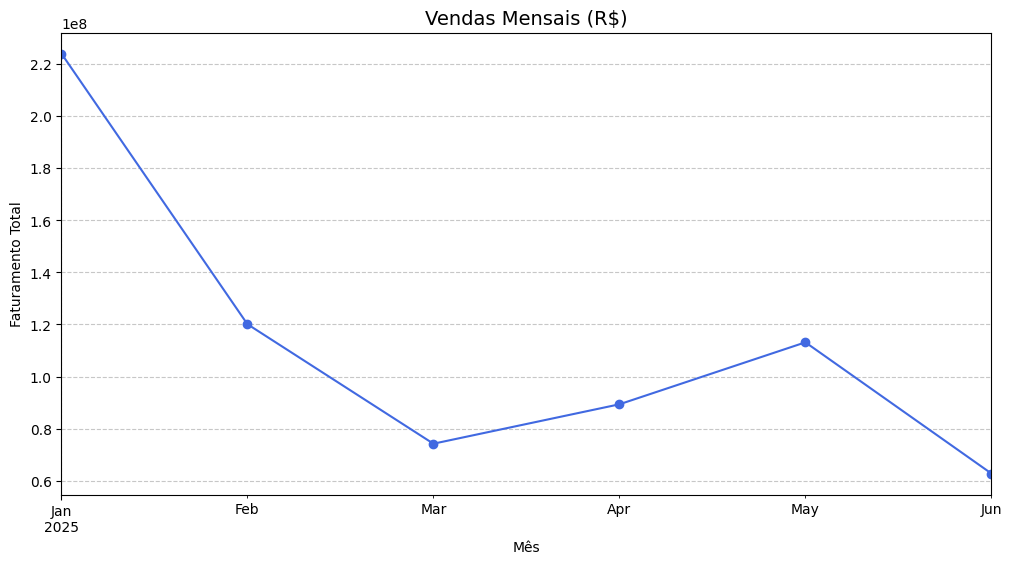

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converta 'Data da venda' para datetime se ainda não for
# df_vendas_enriquecido['Data da venda'] = pd.to_datetime(df_vendas_enriquecido['Data da venda'])

# Vendas por mês
df_vendas_enriquecido['Mês'] = df_vendas_enriquecido['Data da venda'].dt.to_period('M')
vendas_mensais = df_vendas_enriquecido.groupby('Mês')['Valor da nota'].sum()

plt.figure(figsize=(12, 6))
vendas_mensais.plot(kind='line', marker='o', color='royalblue')
plt.title('Vendas Mensais (R$)', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Faturamento Total')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

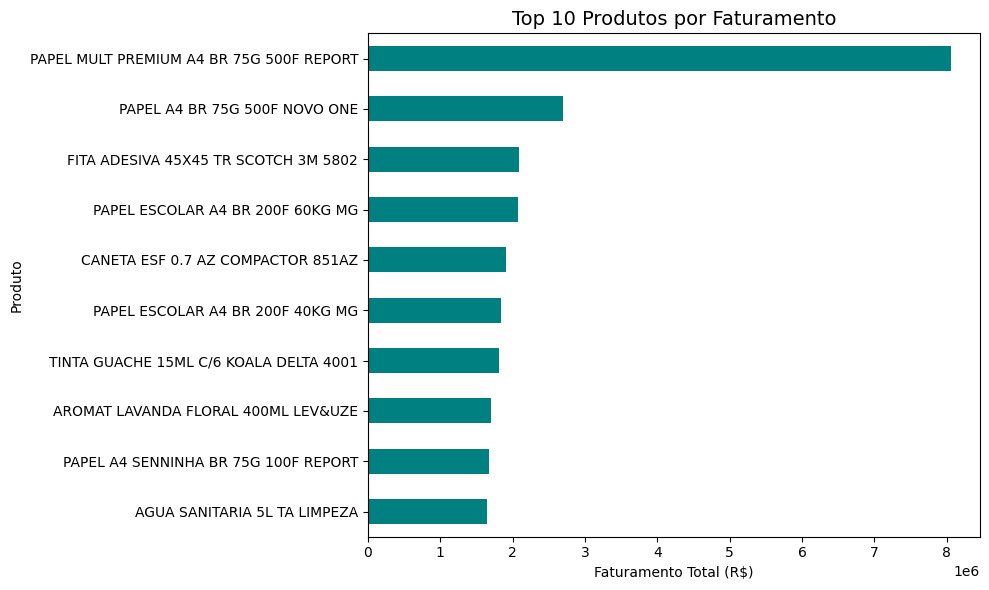

In [33]:
top_produtos = df_vendas_enriquecido.groupby('Descrição do produto')['Valor da nota'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_produtos.sort_values().plot(kind='barh', color='teal')
plt.title('Top 10 Produtos por Faturamento', fontsize=14)
plt.xlabel('Faturamento Total (R$)')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()

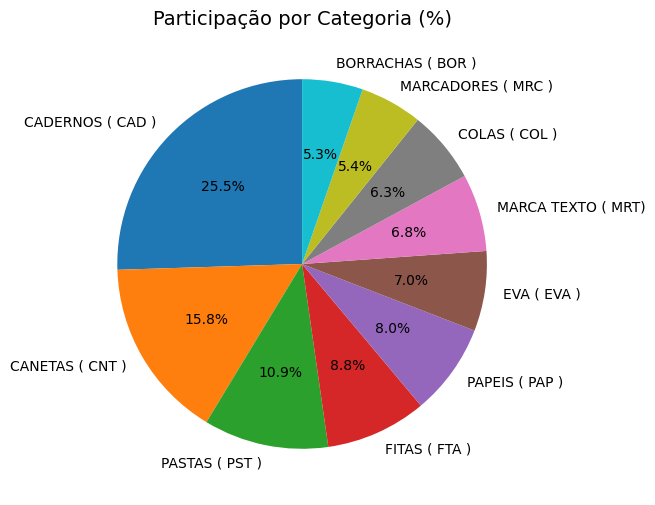

In [34]:
vendas_categoria = df_vendas_enriquecido.groupby('Categoria')['Valor da nota'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
vendas_categoria.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participação por Categoria (%)', fontsize=14)
plt.ylabel('')
plt.show()

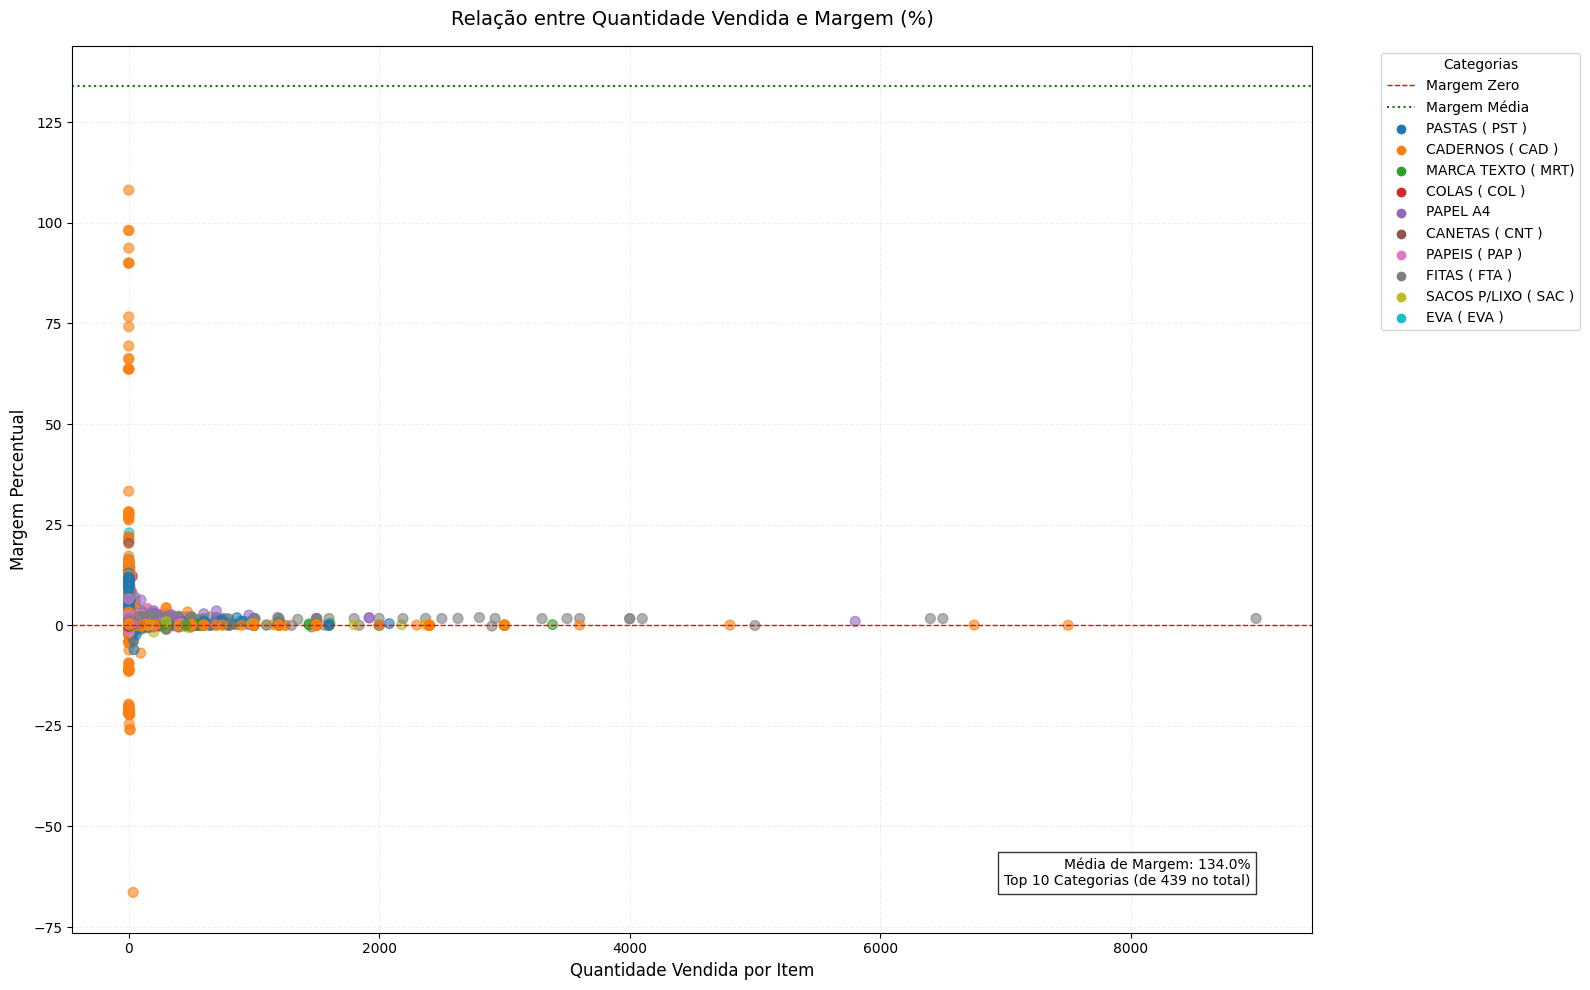

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Configurações iniciais
plt.figure(figsize=(16, 10))

# Filtrar categorias (mostrar apenas as top N para evitar poluição)
top_categorias = df_vendas_enriquecido['Categoria'].value_counts().nlargest(10).index
df_filtrado = df_vendas_enriquecido[df_vendas_enriquecido['Categoria'].isin(top_categorias)]

# Criar o scatter plot simplificado
plt.scatter(
    x=df_filtrado['Quantidade do produto'],
    y=df_filtrado['Margens'],  # Margem em porcentagem
    c=df_filtrado['Categoria'].astype('category').cat.codes,
    cmap='tab10',  # Paleta mais limitada
    alpha=0.6,
    s=50  # Tamanho fixo para melhor legibilidade
)

# Linhas de referência
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Margem Zero')
plt.axhline(y=df_filtrado['Margens'].mean()*100, color='green', linestyle=':', label='Margem Média')

# Títulos e labels
plt.title('Relação entre Quantidade Vendida e Margem (%)', fontsize=14, pad=15)
plt.xlabel('Quantidade Vendida por Item', fontsize=12)
plt.ylabel('Margem Percentual', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.2)

# Legenda simplificada
categorias_unicas = df_filtrado['Categoria'].unique()
for i, categoria in enumerate(categorias_unicas):
    plt.scatter([], [], c=[plt.cm.tab10(i)], label=categoria)  # Marcadores vazios para legenda

plt.legend(title='Categorias', bbox_to_anchor=(1.05, 1), loc='upper left')

# Texto informativo
plt.text(0.95, 0.05,
         f"Média de Margem: {df_filtrado['Margens'].mean()*100:.1f}%\n"
         f"Top 10 Categorias (de {df_vendas_enriquecido['Categoria'].nunique()} no total)",
         transform=plt.gca().transAxes,
         ha='right', va='bottom',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

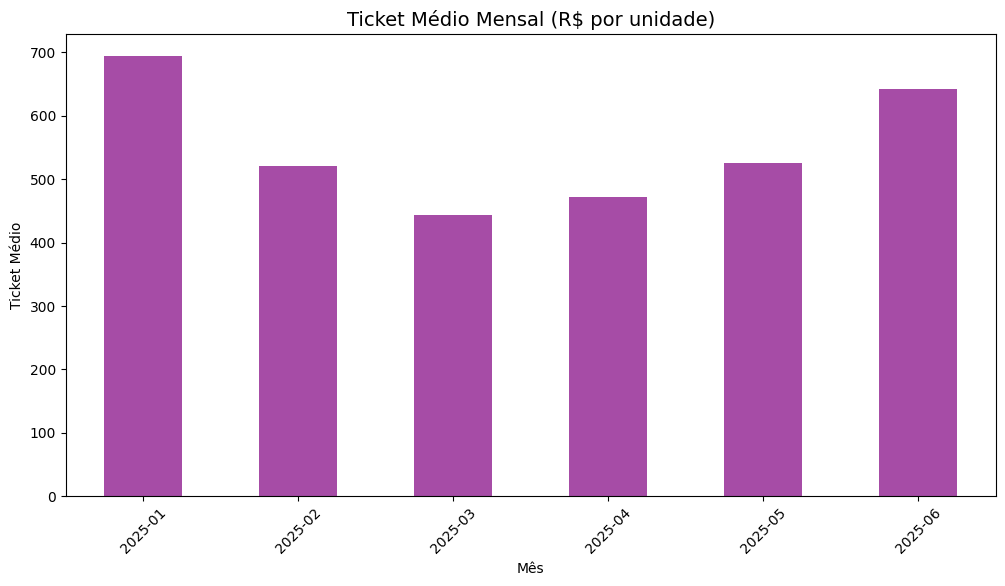

In [36]:
df_vendas_enriquecido['Ticket Médio'] = df_vendas_enriquecido['Valor da nota'] / df_vendas_enriquecido['Quantidade do produto']
ticket_medio_mensal = df_vendas_enriquecido.groupby('Mês')['Ticket Médio'].mean()

plt.figure(figsize=(12, 6))
ticket_medio_mensal.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Ticket Médio Mensal (R$ por unidade)', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Ticket Médio')
plt.xticks(rotation=45)
plt.show()

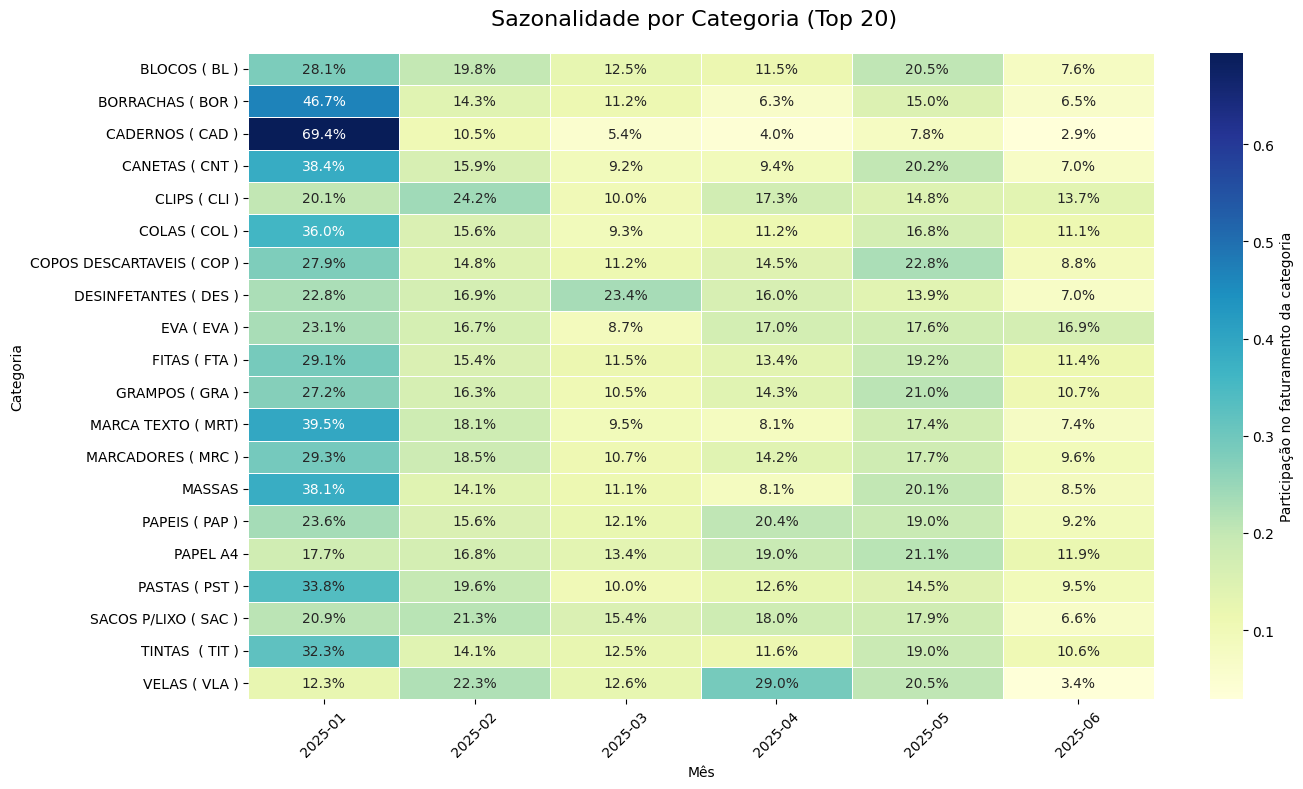

In [37]:
# Preparar dados
df_temp = df_vendas_enriquecido.copy()

# Converter para período mensal e depois para string no formato 'YYYY-MM'
df_temp['Mês'] = df_temp['Data da venda'].dt.to_period('M').astype(str)

# Ordenar os meses cronologicamente
meses_ordenados = sorted(df_temp['Mês'].unique(), key=lambda x: pd.to_datetime(x))

# Filtrar as top 20 categorias
top_categorias = df_temp['Categoria'].value_counts().nlargest(20).index
df_temp = df_temp[df_temp['Categoria'].isin(top_categorias)]

# Criar tabela pivot
pivot_table = df_temp.pivot_table(
    index='Categoria',
    columns='Mês',
    values='Valor da nota',
    aggfunc='sum',
    fill_value=0
)

# Reordenar as colunas pela ordem cronológica
pivot_table = pivot_table[meses_ordenados]

# Normalizar por linha para melhor comparação
pivot_table_norm = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_table_norm,
    cmap='YlGnBu',
    annot=True,
    fmt='.1%',
    linewidths=.5,
    cbar_kws={'label': 'Participação no faturamento da categoria'}
)

plt.title('Sazonalidade por Categoria (Top 20)  ', fontsize=16, pad=20)
plt.xlabel('Mês')
plt.ylabel('Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
df_vendas_enriquecido.columns.tolist()

['Numero nota fiscal',
 'Data da venda',
 'Código produto',
 'Descrição do produto',
 'Quantidade do produto',
 'Valor unitário',
 'Preço venda',
 'Preço de custo',
 'Valor da nota',
 'Margens',
 'Marca',
 'Categoria',
 'Quantidade estoque',
 'Mês',
 'Ticket Médio']

In [39]:
ticket_medio = df_vendas_enriquecido.groupby(["Descrição do produto"])["Ticket Médio"].mean().sort_values(ascending=False)
ticket_medio.head(20)

Descrição do produto
CANETA POINT 88 04 AM LI C/10 STABILO       24284.640000
EVA COR E DES 40X48 C/10FLS IBEL 87         17325.800000
EVA FOLHA 40X95 PR C/10 IBEL 97             13327.220000
PASTA POLIONDA 35MM AM ALAPLAST 260207      12722.767500
KIT CALCINHA LOBINHA ESTAMPADA C/3 LUPO     11926.390000
MEIA SPORTWEAR MASC G LUPO                  11926.390000
CUECA BOXER INF S/COSTURA PT P LUPO 136     11926.390000
FACA PEIXEIRA CARB 7 TRAMONTINA             11808.170000
EVA FOLHA 40X95 CAMURCA C/10 IBEL 73        11456.609750
KIT LEITO SOLT C/2 160X220 TAUPE APPEL      10957.650000
LAPIS HB MUNDO ENCANTADO C/24 CIS 560700    10751.640000
LAPISEIRA 0.7MM PANDA COLORS C/12 BRW       10751.640000
LAPIS HB BLACKPEPS JUMBO C/46 MAPED         10751.640000
EVA FOLHA 40X48 CENOURA C/10 IBEL 58        10441.434167
CADERNO INTELIGENTE M LUARA MALDIVES        10409.740000
CADERNO INTELIGENTE M BLUE JOURNAL          10409.740000
EVA FOLHA 40X95 CERAMICA C/10 IBEL 79       10283.215750
CADERNO IN

In [40]:
v_total_nota = df_vendas_enriquecido["Valor da nota"].sum()
q_total_nota = df_vendas_enriquecido["Numero nota fiscal"].value_counts()
media_nota = df_vendas_enriquecido["Valor da nota"].mean()
valor_max = df_vendas_enriquecido["Valor da nota"].max()
valor_min = df_vendas_enriquecido["Valor da nota"].min()
cal_fat = v_total_nota.round(2) / q_total_nota.sum()
print(f"Faturamento total R$ {cal_fat}")
print(f"valor total das notas R$ {v_total_nota.round(2)}\nValor médio das notas R$ {media_nota}\nValor máximo R$ {valor_max}, e a Nota com o menor valor é de R$ {valor_min}")

Faturamento total R$ 2089.546597188901
valor total das notas R$ 683705915.24
Valor médio das notas R$ 2089.546597188901
Valor máximo R$ 178016.72, e a Nota com o menor valor é de R$ 1.04


In [41]:
# Criar colunas de Ano-Mês e filtrar categorias relevantes
df_vendas_enriquecido['Ano-Mês'] = df_vendas_enriquecido['Data da venda'].dt.to_period('M').astype(str)
top_categorias = df_vendas_enriquecido['Categoria'].value_counts().nlargest(10).index  # Top 10 categorias
df_filtrado = df_vendas_enriquecido[df_vendas_enriquecido['Categoria'].isin(top_categorias)]

In [42]:
# Calcular média de margem agregada
media_margem = df_filtrado.groupby(['Ano-Mês', 'Categoria'])['Margens'].mean().unstack()

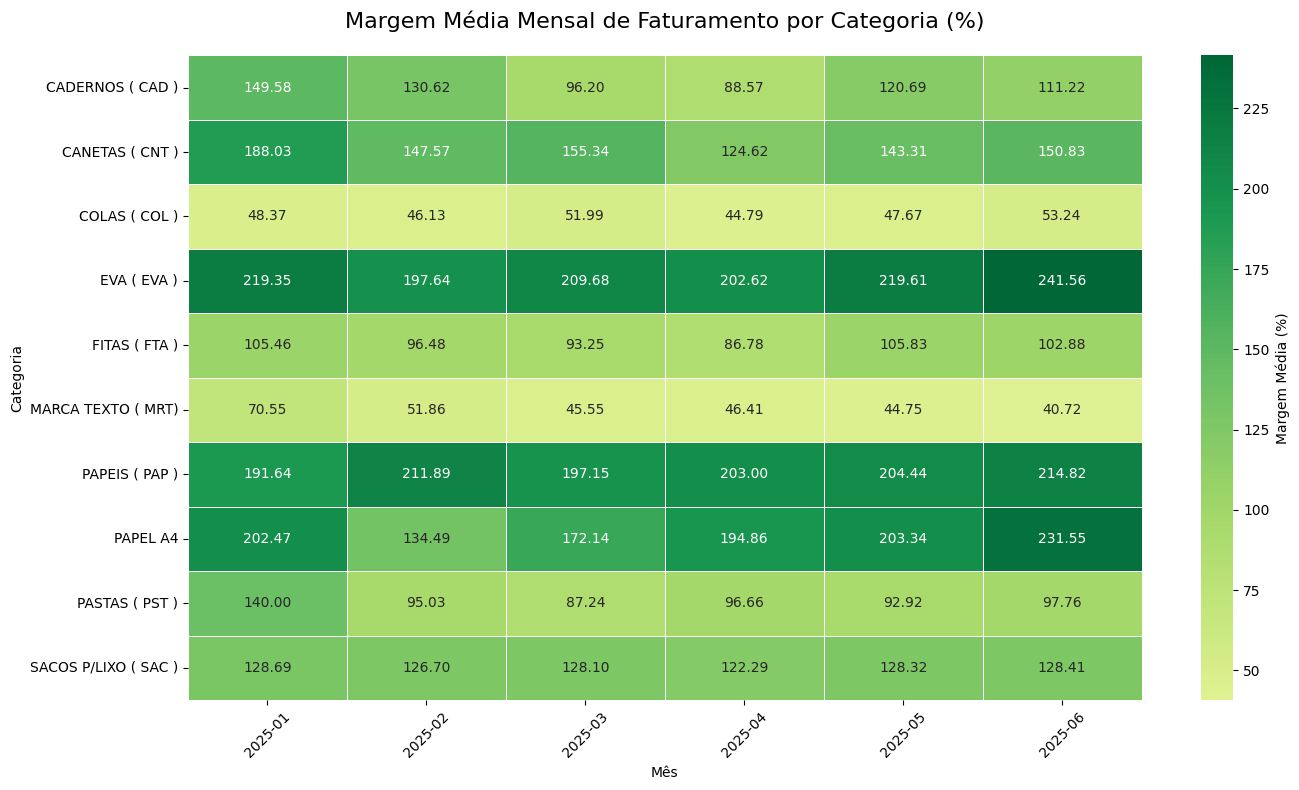

In [43]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    media_margem.T * 100,  # Converter para porcentagem
    cmap='RdYlGn',         # Cores: vermelho (baixo) a verde (alto)
    annot=True,            # Mostrar valores
    fmt='.2f',            # 1 casa decimal
    linewidths=.5,
    center=0,             # Centralizar na margem zero
    cbar_kws={'label': 'Margem Média (%)'}
)

plt.title('Margem Média Mensal de Faturamento por Categoria (%)', fontsize=16, pad=20)
plt.xlabel('Mês')
plt.ylabel('Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

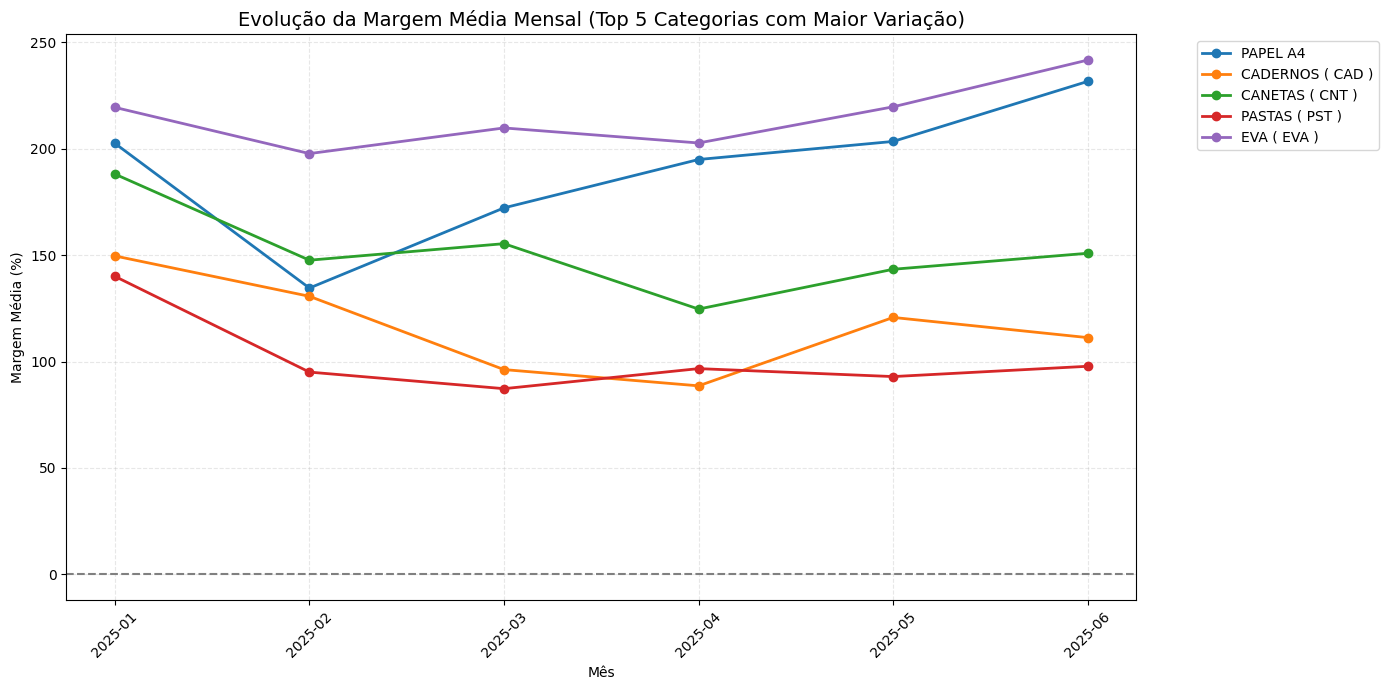

In [44]:
plt.figure(figsize=(14, 7))

# Plotar as 5 categorias com maior variação
for categoria in media_margem.std().nlargest(5).index:
    plt.plot(
        media_margem.index,
        media_margem[categoria] * 100,
        marker='o',
        label=categoria,
        linewidth=2
    )

plt.title('Evolução da Margem Média Mensal (Top 5 Categorias com Maior Variação)', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Margem Média (%)')
plt.axhline(y=0, color='gray', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
tabela_resumo = media_margem.describe().T
tabela_resumo['Variação (%)'] = (media_margem.max() - media_margem.min()) * 100
print(tabela_resumo[['mean', 'min', 'max', 'Variação (%)']].sort_values('mean', ascending=False))

                          mean       min       max  Variação (%)
Categoria                                                       
EVA ( EVA )           2.150773  1.976387  2.415632     43.924568
PAPEIS ( PAP )        2.038233  1.916410  2.148229     23.181902
PAPEL A4              1.898093  1.344923  2.315458     97.053473
CANETAS ( CNT )       1.516168  1.246224  1.880280     63.405606
SACOS P/LIXO ( SAC )  1.270855  1.222889  1.286866      6.397714
CADERNOS ( CAD )      1.161468  0.885729  1.495779     61.004988
PASTAS ( PST )        1.015998  0.872383  1.399953     52.756981
FITAS ( FTA )         0.984458  0.867796  1.058256     19.045982
MARCA TEXTO ( MRT)    0.499723  0.407218  0.705461     29.824357
COLAS ( COL )         0.486979  0.447850  0.532389      8.453834


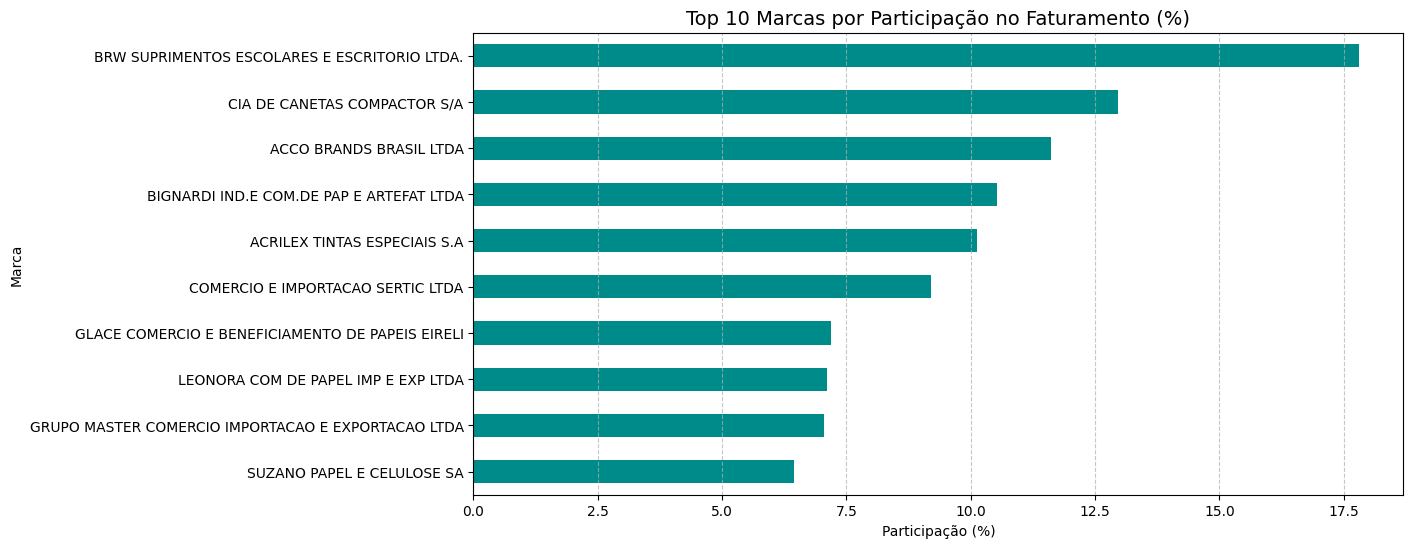

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular participação no faturamento
market_share = df_vendas_enriquecido.groupby('Marca')['Valor da nota'].sum().nlargest(10)
market_share_pct = (market_share / market_share.sum()) * 100

# Plot
plt.figure(figsize=(12, 6))
market_share_pct.sort_values().plot(kind='barh', color='darkcyan')
plt.title('Top 10 Marcas por Participação no Faturamento (%)', fontsize=14)
plt.xlabel('Participação (%)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Paulo Neto\AppData\Local\Temp\ipykernel_13828\2213543011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=margem_marca.values, y=margem_marca.index, palette='viridis')


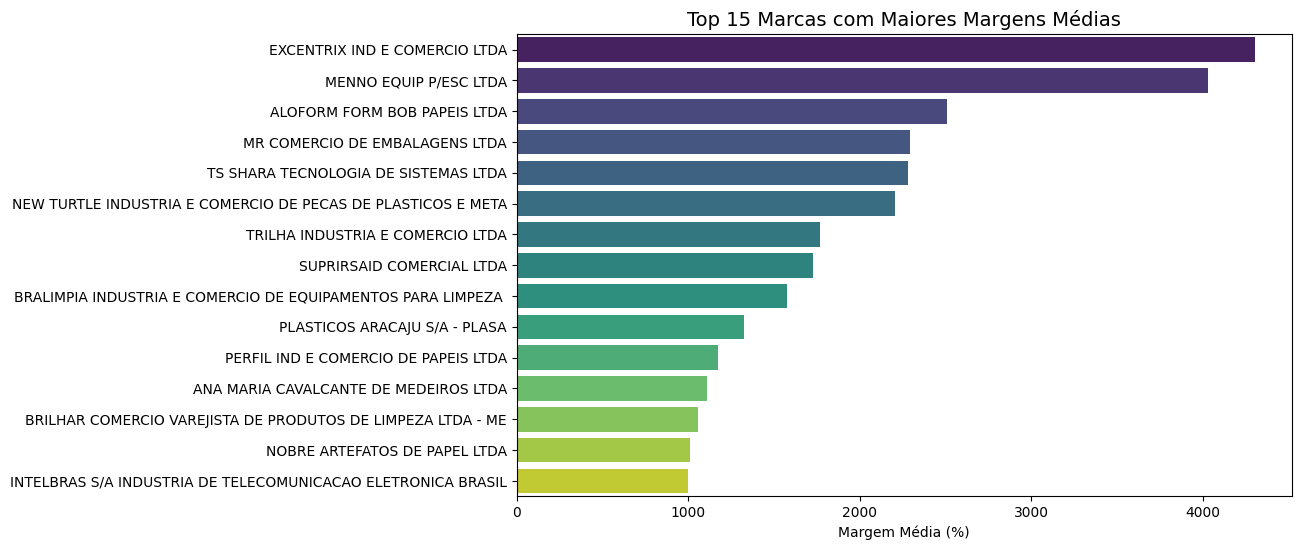

In [47]:
# Calcular margem média por marca (top 15)
margem_marca = df_vendas_enriquecido.groupby('Marca')['Margens'].mean().nlargest(15)
margem_marca = margem_marca * 100  # Converter para %

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=margem_marca.values, y=margem_marca.index, palette='viridis')
plt.title('Top 15 Marcas com Maiores Margens Médias', fontsize=14)
plt.xlabel('Margem Média (%)')
plt.ylabel('')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

In [48]:
# Configurações iniciais
plt.figure(figsize=(16, 10))

# Definir faixas de volume para categorização
bins = [1000, 5000, 10000, 50000, 100000]
labels = ['1k-5k', '5k-10k', '10k-50k', '50k+']
marca_stats['Faixa_Volume'] = pd.cut(marca_stats['Quantidade do produto'], bins=bins, labels=labels)

# Paleta de cores mais intuitiva
paleta = {
    '1k-5k': 'lightsteelblue',
    '5k-10k': 'cornflowerblue',
    '10k-50k': 'royalblue',
    '50k+': 'darkblue'
}

# Plot com categorização por volume
for faixa in labels:
    subset = marca_stats[marca_stats['Faixa_Volume'] == faixa]
    plt.scatter(
        x=subset['Valor unitário'],
        y=subset['Margens']*100,
        s=subset['Quantidade do produto']/100,
        alpha=0.7,
        color=paleta[faixa],
        label=f'Volume {faixa} unidades'
    )

# Linhas de referência
plt.axhline(y=marca_stats['Margens'].mean()*100, color='gray', linestyle='--', label='Margem Média')
plt.axvline(x=marca_stats['Valor unitário'].median(), color='gray', linestyle=':', label='Preço Médio')

# Configurações do gráfico
plt.title('Relação Preço-Margem por Volume de Vendas', fontsize=16, pad=20)
plt.xlabel('Preço Unitário Médio (R$)', fontsize=12)
plt.ylabel('Margem Média (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.2)

# Legenda aprimorada
legend1 = plt.legend(title='Volume de Vendas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().add_artist(legend1)

# Legenda secundária para linhas de referência
plt.legend(['Margem Média', 'Preço Médio'], bbox_to_anchor=(1.05, 0.7), loc='upper left')

# Texto informativo
plt.text(0.95, 0.05,
         f"Total de Marcas Analisadas: {len(marca_stats)}\n"
         f"Período: {df_vendas_enriquecido['Data da venda'].dt.year.min()}-{df_vendas_enriquecido['Data da venda'].dt.year.max()}",
         transform=plt.gca().transAxes,
         ha='right', va='bottom',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

NameError: name 'marca_stats' is not defined

<Figure size 1600x1000 with 0 Axes>

In [ ]:
u = df_vendas_enriquecido["Valor unitário"].mean()
c = df_vendas_enriquecido["Preço de custo"].mean()
v = df_vendas_enriquecido["Preço venda"].mean()
tm = df_vendas_enriquecido["Ticket Médio"].mean()
vn = df_vendas_enriquecido["Valor da nota"].mean()
print(f"\nValor médio dos valores unitários {u.round(2)}\nValor médio do preço de custo {c.round(2)}\nValor médio do preço de venda {v.round(2)}\nValor médio do tickmédio {tm.round(2)}\nValor médio do valor total das notas {vn.round(2)}")


Valor médio dos valores unitários 16.03
Valor médio do preço de custo 11.79
Valor médio do preço de venda 13.21
Valor médio do tickmédio 558.91
Valor médio do valor total das notas 2089.55


Meses presentes nos dados: ['Junho' 'Maio' 'Abril' 'Marã§o' 'Fevereiro' 'Janeiro']


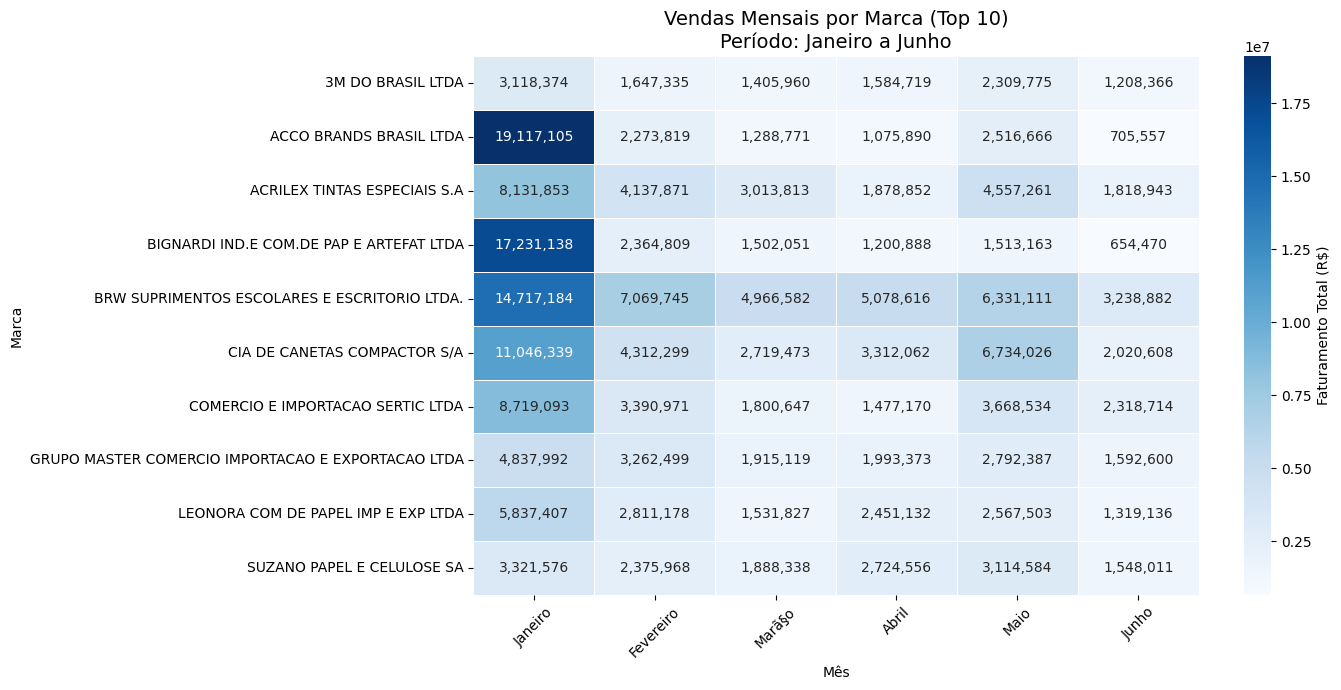

In [ ]:
# Preparar dados
top_marcas = df_vendas_enriquecido['Marca'].value_counts().nlargest(10).index
df_temp = df_vendas_enriquecido[df_vendas_enriquecido['Marca'].isin(top_marcas)].copy()

# 1. Extrair mês em português CORRETAMENTE
df_temp['Mês'] = df_temp['Data da venda'].dt.month_name(locale="pt_BR.utf-8")

# 2. Verificar quais meses realmente existem nos dados
meses_presentes = df_temp['Mês'].unique()
print("Meses presentes nos dados:", meses_presentes)  # Debug

# 3. Ordem cronológica completa em português
ordem_meses = ['Janeiro', 'Fevereiro', 'Marã§o', 'Abril', 'Maio', 'Junho']

# 4. Criar pivot table SEM converter para categorical primeiro
pivot_marca = df_temp.pivot_table(
    index='Marca',
    columns='Mês',
    values='Valor da nota',
    aggfunc='sum',
    fill_value=0
)

# 5. Reordenar colunas mantendo apenas meses existentes
meses_ordenados = [m for m in ordem_meses if m in pivot_marca.columns]
pivot_marca = pivot_marca[meses_ordenados]

# Debug: Verificar dados de março
if 'Março' in pivot_marca.columns:
    print("\nExemplo de dados para Março:")
    print(pivot_marca['Março'].head())

# Plot
plt.figure(figsize=(14, 7))
sns.heatmap(
    pivot_marca,
    cmap='Blues',
    annot=True,
    fmt=',.0f',
    linewidths=.5,
    cbar_kws={'label': 'Faturamento Total (R$)'}
)
plt.title(f'Vendas Mensais por Marca (Top 10)\nPeríodo: {meses_ordenados[0]} a {meses_ordenados[-1]}', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Marca')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_vendas_enriquecido.columns.tolist()

['Numero nota fiscal',
 'Data da venda',
 'Código produto',
 'Descrição do produto',
 'Quantidade do produto',
 'Valor unitário',
 'Preço venda',
 'Preço de custo',
 'Valor da nota',
 'Margens',
 'Marca',
 'Categoria',
 'Quantidade estoque',
 'Mês',
 'Ticket Médio',
 'Ano-Mês']

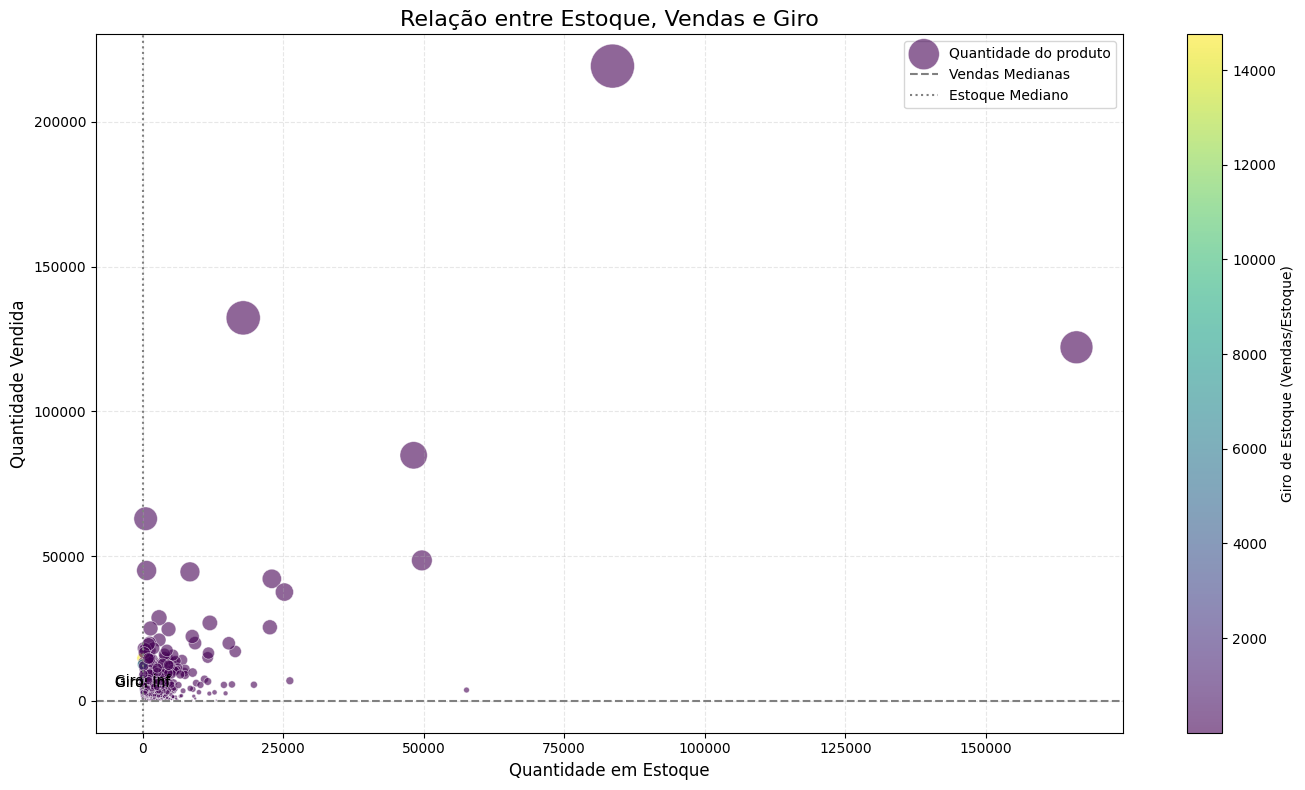

In [ ]:
plt.figure(figsize=(14, 8))

# Calcular tamanho dos bubbles (normalizado)
sizes = (df_estoque_vs_vendas['Quantidade do produto'] / df_estoque_vs_vendas['Quantidade do produto'].max() * 1000)

scatter = plt.scatter(
    x='Quantidade estoque',
    y='Quantidade do produto',
    s=sizes,
    c='Giro',
    data=df_estoque_vs_vendas,
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

# Linhas de referência
plt.axhline(y=df_estoque_vs_vendas['Quantidade do produto'].median(), color='gray', linestyle='--', label='Vendas Medianas')
plt.axvline(x=df_estoque_vs_vendas['Quantidade estoque'].median(), color='gray', linestyle=':', label='Estoque Mediano')

# Configurações
plt.colorbar(scatter, label='Giro de Estoque (Vendas/Estoque)')
plt.title('Relação entre Estoque, Vendas e Giro', fontsize=16)
plt.xlabel('Quantidade em Estoque', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Anotar outliers
top_giro = df_estoque_vs_vendas.nlargest(3, 'Giro')
for idx, row in top_giro.iterrows():
    plt.annotate(f"Giro: {row['Giro']:.1f}", 
                 (row['Quantidade estoque'], row['Quantidade do produto']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.tight_layout()
plt.show()

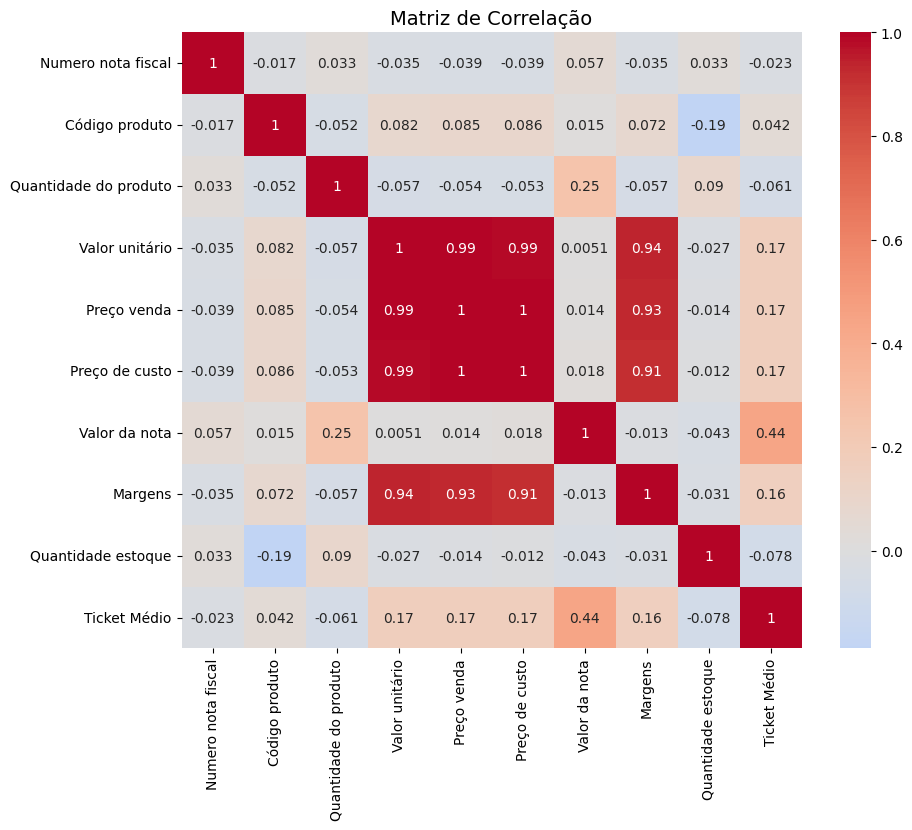

In [ ]:
# Matriz de correlação entre variáveis numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df_vendas_enriquecido.select_dtypes(include=['float64', 'int64']).corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação', fontsize=14)
plt.show()

In [ ]:
lista_tamanho = []
for valor in df_vendas_enriquecido.columns.tolist():
    tamanho = len(valor)
    lista_tamanho.append(tamanho)

print(lista_tamanho)

[18, 13, 14, 20, 21, 14, 11, 14, 13, 7, 5, 9, 18, 3, 12, 7]
